In [1]:
import numpy as np

###MSE

In [2]:
class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_pred - y_true) ** 2).mean()

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    #print('MSE backward', self.y_pred.shape, self.y_true.shape, self.gradient.shape)
    return self.gradient

### Fit fuction

In [3]:
from typing import Callable

def fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)

###2-d input 1-d output

####Linear model

In [4]:
class Linear:
  def __init__(self, input_dim: int, num_hidden: int = 1):
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)
  
  def __call__(self, x):
    self.x = x
    output = x @ self.weights + self.bias
    return output

  def backward(self, gradient):
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum(axis=0)
    self.x_gradient = gradient @ self.weights.T
    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

#### Two dimention input

(100, 2) (2, 1) (1,)
x: (100, 2), weights: (2, 1), bias: (1,), y: (100, 1)


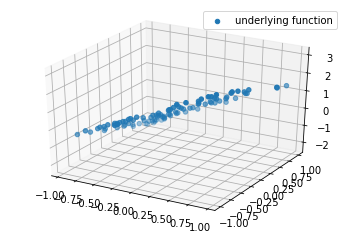

In [5]:
# What about 2-dimensional x?

n = 100
d = 2
x = np.random.uniform(-1, 1, (n, d))

# y = w * x + b
# y = w_0 * x_0 + w_1 * x_1 + w_2 * x_2 + b
# y = w@x + b

weights_true = np.array([[2, -1], ]).T
bias_true = np.array([0.5])
print(x.shape, weights_true.shape, bias_true.shape)

y_true = x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

def plot_3d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], y, label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='our function')
  plt.legend()

plot_3d(x, y_true)

####Initialize linear and loss for two dimention data

1.9748071506225242


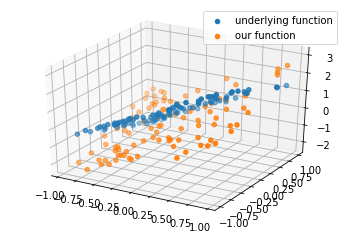

In [6]:
loss = MSE()
linear = Linear(2)
y_pred = linear(x)
print(loss(y_pred, y_true))
fig = plot_3d(x, y_true, y_pred)

####Train two dimention data

Epoch 0, loss 1.9748071506225242
Epoch 1, loss 1.6278569160605219
Epoch 2, loss 1.3606368658447012
Epoch 3, loss 1.1499324882868744
Epoch 4, loss 0.9802689371717324
Epoch 5, loss 0.8411748918529861
Epoch 6, loss 0.7254353874443146
Epoch 7, loss 0.6279732985754962
Epoch 8, loss 0.5451308050494725
Epoch 9, loss 0.47420566758949667
Epoch 10, loss 0.41315011032827537
Epoch 11, loss 0.3603737127444062
Epoch 12, loss 0.3146130398637338
Epoch 13, loss 0.2748442769328709
Epoch 14, loss 0.24022373153978382
Epoch 15, loss 0.2100465284880471
Epoch 16, loss 0.18371729611787466
Epoch 17, loss 0.1607288537337316
Epoch 18, loss 0.14064631918659395
Epoch 19, loss 0.12309495582269418


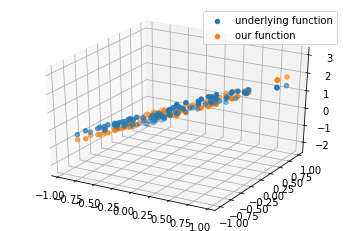

In [7]:
fit(x, y_true, model=linear, loss=loss, lr=0.1, num_epochs=20)
plot_3d(x, y_true, linear(x))

###3-d input 2-d output

#### Three dimention input

In [32]:
# What about 3-dimensional x?

n = 100
d = 3
x = np.random.uniform(-1, 1, (n, d))

# y = w * x + b
# y = w_0 * x_0 + w_1 * x_1 + w_2 * x_2 + b
# y = w@x + b

weights_true = np.array([[3, 1, -1],[2, 0, -2], ]).T
bias_true = np.array([0.5, 0.1])
print(x.shape, weights_true.shape, bias_true.shape)

y_true = x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')


(100, 3) (3, 2) (2,)
x: (100, 3), weights: (3, 2), bias: (2,), y: (100, 2)


#### Non-Linear Tensorflow/Keras model with 3 layers

In [34]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers

inputs = keras.Input(shape=(3,))
l1 = layers.Dense(10, activation='relu', name='dense_1')(inputs)
l2 = layers.Dense(10, activation='relu', name='dense_2')(l1)
outputs = layers.Dense(2, name='regression')(l2)

model = keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())
model.compile(loss='mse', optimizer=optimizers.SGD(0.1))

model.fit(x, y_true, epochs=20)

y_pred = model.predict(x)


Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 3)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                40        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
regression (Dense)           (None, 2)                 22        
Total params: 172
Trainable params: 172
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
4/4 [==============================] - 0s 3ms/step - loss: 2.6863
Epoch 2/20
4/4 [==============================] - 0s 3ms/step - loss: 2.4449
Epoch 3/20
4/4 [==============================] - 0s 3ms/step - loss: 2.2160
Epoch 4/20
4/4 [=======

(100, 3) (3, 2) (2,)
x: (100, 3), weights: (3, 2), bias: (2,), y: (100, 2)


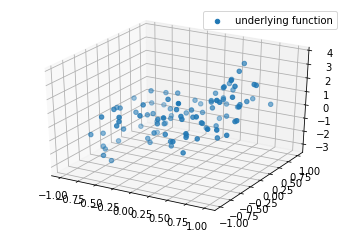

In [17]:
# What about 3-dimensional x?

n = 100
d = 3
x = np.random.uniform(-1, 1, (n, d))

# y = w * x + b
# y = w_0 * x_0 + w_1 * x_1 + w_2 * x_2 + b
# y = w@x + b

weights_true = np.array([[3, 1, -1],[2, 0, -2], ]).T
bias_true = np.array([0.5, 0.1])
print(x.shape, weights_true.shape, bias_true.shape)

y_true = x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

def plot_3d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], y, label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='our function')
  plt.legend()

plot_3d(x, y_true[:, 1])